### Dotscience settings

Here we tell dotscience which dots are used for input and output, as well as labels which can later be queried.

In [33]:
import dotscience as ds
ds.label('model_type','linear_regression')

'linear_regression'

## Linear regression - predict house prices based on features

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv(ds.input('combined-filtered-housing-data.csv'))

We hypothesise that `finishedsqft`, `bathrooms` and `bedrooms` are positively correlated with `lastsoldprice`. Let's plot these to see.

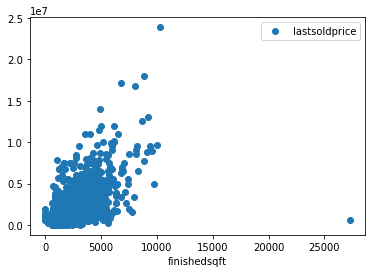

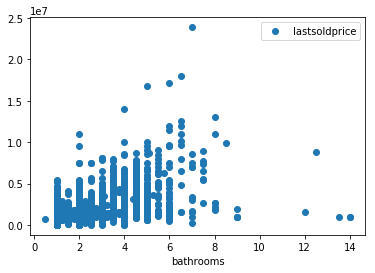

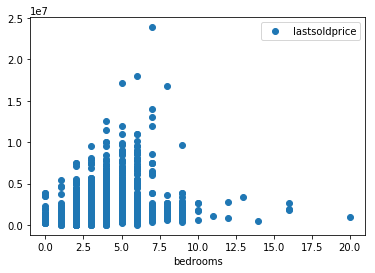

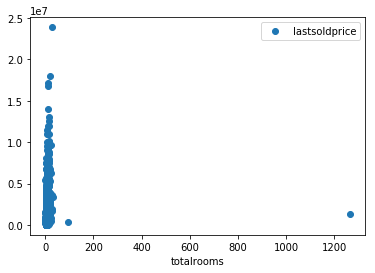

In [36]:
df.plot(x='finishedsqft', y='lastsoldprice', style='o')
df.plot(x='bathrooms', y='lastsoldprice', style='o')
df.plot(x='bedrooms', y='lastsoldprice', style='o')
df.plot(x='totalrooms', y='lastsoldprice', style='o')

Now let's perform a linear regression on those features to model `lastsoldprice`

In [37]:
features = ['finishedsqft']
X = df[features]
Y = df['lastsoldprice']

These are our features:

In [38]:
X.head()

,finishedsqft
0,1450
1,780
2,1730
3,3215
4,1464


In [39]:
# Split data into test and training set. Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred = regressor.predict(X_test)
regressor_score = regressor.score(X_test, y_test)
print('Linear Regression coefficient of determination (R squared): %.4f' % regressor_score)

Linear Regression coefficient of determination (R squared): 0.4446


In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 725557.6191


In [42]:
from sklearn.externals import joblib
joblib.dump(regressor, ds.output('linear_regressor.pkl'))

['linear_regressor.pkl']

---
### Dotscience parameters & summary

First, let's capture the parameters we used.
In this case, it's just a list of features.

Let's also capture the resulting summary statistics: how well the model performed.

As soon as we write these to the file, dotscience will automatically version the input data, code, model & environment - everything needed to reproduce the result later.

In [43]:
ds.summary('lin_rmse', lin_rmse)
ds.summary('regressor_score', regressor_score)
ds.parameter('features',", ".join(sorted(features)))
ds.publish()

[[DOTSCIENCE-RUN:20932f44-f074-4416-a7bc-df7602acab77]]{
    "end": "20181205T215226.090688",
    "input": [
        "combined-filtered-housing-data.csv"
    ],
    "labels": {
        "model_type": "linear_regression"
    },
    "output": [
        "linear_regressor.pkl"
    ],
    "parameters": {
        "features": "finishedsqft"
    },
    "start": "20181205T215149.531697",
    "summary": {
        "lin_rmse": "725557.619091",
        "regressor_score": "0.444647830535"
    },
    "version": "1"
}[[/DOTSCIENCE-RUN:20932f44-f074-4416-a7bc-df7602acab77]]
